# Model Training

## Thyroid Disease Detection: Single Input Prediction

In [1]:
import pandas as pd
import numpy as np
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Thyroid Disease Detection/InputFile.csv")
data.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [3]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [4]:
selected_col = ['age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'goitre', 'hypopituitary', 'psych','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']

In [5]:
df = data.copy()

df = df[selected_col]

In [6]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,?,?,negative
2,46,M,f,f,f,f,f,0.98,?,109,0.91,120,negative
3,70,F,t,f,f,f,f,0.16,1.9,175,?,?,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   on_antithyroid_medication  3772 non-null   object
 4   goitre                     3772 non-null   object
 5   hypopituitary              3772 non-null   object
 6   psych                      3772 non-null   object
 7   TSH                        3772 non-null   object
 8   T3                         3772 non-null   object
 9   TT4                        3772 non-null   object
 10  T4U                        3772 non-null   object
 11  FTI                        3772 non-null   object
 12  Class                      3772 non-null   object
dtypes: object(13)
memory usage: 383.2+ KB


# Checking number of invalid value like '?' present in each column


In [8]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, count)

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385


# Now let's replace the '?' values with numpy nan

In [9]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)

In [10]:
# lets check "?" present in every columns

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, count)

age 0
sex 0
on_thyroxine 0
on_antithyroid_medication 0
goitre 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


# Null Values Imputation

In [11]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
on_antithyroid_medication      0
goitre                         0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
dtype: int64

### Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

In [12]:
# In sex column we have to map 0 for F and 1 for M

df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# let's write map them all in one go
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require.

In [13]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23,0.0,0,0,0,0,0,4.1,2,102,NaN,NaN,negative
2,46,1.0,0,0,0,0,0,0.98,NaN,109,0.91,120,negative
3,70,0.0,1,0,0,0,0,0.16,1.9,175,NaN,NaN,negative
4,70,0.0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative


In [14]:
# target class

df["Class"].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(df['Class'])

df['Class'] = encoder.transform(df['Class'])

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "encoder.pickle"
pickle.dump(encoder, open(file, "wb"))

In [16]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,1.3,2.5,125,1.14,109,1
1,23,0.0,0,0,0,0,0,4.1,2,102,NaN,NaN,1
2,46,1.0,0,0,0,0,0,0.98,NaN,109,0.91,120,1
3,70,0.0,1,0,0,0,0,0.16,1.9,175,NaN,NaN,1
4,70,0.0,0,0,0,0,0,0.72,1.2,61,0.87,70,1


### Now that we have encoded all our Categorical values. Let's start with imputing the missing values.

In [17]:
import sklearn.impute

imputer=sklearn.impute.KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values

# convert the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [18]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
on_antithyroid_medication    0
goitre                       0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

# Count plot for target class

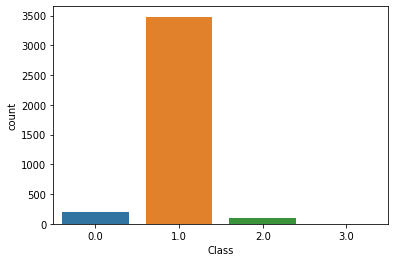

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(new_df['Class'])
plt.show()

### We can clerly see that the dataset is highly imbalanced.

- We will use a python library known as imbalanced-learn to deal with imbalanced data. Imbalanced learn has an algorithm called RandomOverSampler.

In [20]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler

In [21]:
x = new_df.drop(['Class'],axis=1)
y = new_df['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(x,y)

In [22]:
x_sampled

array([[ 41.,   0.,   0., ..., 125.,   1., 109.],
       [ 23.,   0.,   0., ..., 102.,   1., 108.],
       [ 46.,   1.,   0., ..., 109.,   1., 120.],
       ...,
       [ 46.,   0.,   0., ...,  48.,   1.,  54.],
       [ 41.,   1.,   0., ...,  22.,   1.,  57.],
       [ 41.,   1.,   0., ...,  22.,   1.,  57.]])

In [23]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0


In [24]:
x_sampled.shape

(13924, 12)

In [25]:
y_sampled

array([1., 1., 1., ..., 3., 3., 3.])

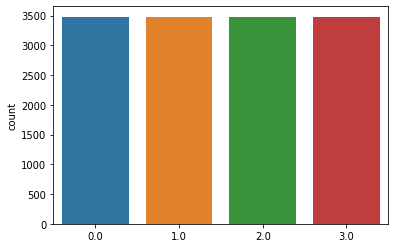

In [26]:
sns.countplot(y_sampled)

In [27]:
x_sampled

,age,sex,on_thyroxine,on_antithyroid_medication,goitre,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13919,46.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,48.0,1.0,54.0
13920,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,1.0,57.0
13921,46.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,48.0,1.0,54.0
13922,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,1.0,57.0


## Model Training

### Create a Test Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size = 0.3, random_state = 42)

## Training and Evaluating on the Training Set

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression(penalty="l2", solver="newton-cg", multi_class="multinomial", C = 1, max_iter=500, verbose = 1)

In [32]:
log_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [33]:
log_model.score(x_train,y_train)

0.9604966139954854

In [34]:
#Cross Validation Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, x_train, y_train,scoring="accuracy", cv=20)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [35]:
np.mean(scores)

0.9598800366916889

In [36]:
scores

array([0.95081967, 0.96721311, 0.94877049, 0.97131148, 0.96516393,
       0.96516393, 0.96303901, 0.95071869, 0.94455852, 0.94661191,
       0.96919918, 0.97125257, 0.95277207, 0.95687885, 0.97535934,
       0.97330595, 0.95277207, 0.96303901, 0.95482546, 0.95482546])

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = DecisionTreeClassifier(criterion="gini", splitter="random", max_depth=5, random_state=42)

In [42]:
clf = clf.fit(x_train,y_train)

In [43]:
clf.score(x_train,y_train)

0.9427457418428073

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
dt_scores = cross_val_score(clf,x_train,y_train,scoring="accuracy", cv = 20)
np.mean(dt_scores)

0.9273624482445214

In [46]:
dt_scores

array([0.87295082, 0.86270492, 0.96311475, 0.94672131, 0.88729508,
       0.95696721, 0.94250513, 0.95071869, 0.93634497, 0.91170431,
       0.86036961, 0.93223819, 0.95687885, 0.92607803, 0.96098563,
       0.94250513, 0.94250513, 0.91991786, 0.94661191, 0.92813142])

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=5, bootstrap=True, random_state=100, oob_score=True, verbose = 1)

In [49]:
rf_clf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=100, verbose=1,
                       warm_start=False)

In [50]:
rf_clf.score(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


0.9883028934947671

In [ ]:
rf_scores = cross_val_score(rf_clf,x_train,y_train,scoring="accuracy", cv = 20)

rf_scores

In [52]:
rf_scores

array([0.98155738, 0.98155738, 0.99385246, 0.99180328, 0.99180328,
       0.9897541 , 0.98767967, 0.98973306, 0.97946612, 0.98151951,
       0.99383984, 0.99178645, 0.99383984, 0.98973306, 0.99794661,
       0.98767967, 0.98562628, 0.98151951, 0.98562628, 0.98562628])

In [63]:
rf_clf.oob_score_

0.9879950749025241

## Bagging

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Bagging with decision tree

In [54]:

bag_DT = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [55]:
bag_DT.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [56]:
bag_DT.score(x_train,y_train)

0.9974348450646419

### Bagging using SVM

In [59]:
bag_svm = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [60]:
bag_svm.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.25, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [61]:
bag_svm.score(x_train,y_train)

0.9501333880566386

## XGBoost

In [64]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
xg_clf=xgboost.XGBClassifier()

In [65]:
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
xg_clf.score(x_train,y_train)

0.9950749025241125

### Hyperparameter Tuning for XGBoost

In [67]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [70]:
xg_randomcv = RandomizedSearchCV(xg_clf,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [71]:
xg_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [72]:
#best model from random search cv
xg_model = xg_randomcv.best_estimator_

In [73]:
#making prediction
xg_predictions = xg_model.predict(x_test)

### Evaluation Metrics

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test,xg_predictions))
print(accuracy_score(y_test,xg_predictions))
print(classification_report(y_test,xg_predictions))

[[1073    0    0    0]
 [  15 1015    2    0]
 [   0    0 1028    0]
 [   0    0    0 1045]]
0.9959310674964098
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1073
         1.0       1.00      0.98      0.99      1032
         2.0       1.00      1.00      1.00      1028
         3.0       1.00      1.00      1.00      1045

    accuracy                           1.00      4178
   macro avg       1.00      1.00      1.00      4178
weighted avg       1.00      1.00      1.00      4178



In [88]:
np.array(x_train)

array([[ 53.,   0.,   0., ...,  14.,   1.,  11.],
       [ 42.,   1.,   0., ...,  28.,   1.,  33.],
       [ 60.,   1.,   0., ...,  23.,   1.,  34.],
       ...,
       [ 63.,   0.,   0., ...,  86.,   1., 120.],
       [ 65.,   0.,   1., ..., 168.,   1., 171.],
       [ 60.,   0.,   0., ...,  42.,   1.,  39.]])

In [89]:
y_train

array([2., 2., 2., ..., 0., 1., 2.])

In [90]:
xg_randomcv.fit(np.array(x_train),y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [91]:
xg_model_final = xg_randomcv.best_estimator_

In [93]:
xg_predictions_final = xg_model_final.predict(np.array(x_test))

In [94]:
print(confusion_matrix(y_test,xg_predictions_final))
print(accuracy_score(y_test,xg_predictions_final))
print(classification_report(y_test,xg_predictions_final))

[[1073    0    0    0]
 [  14 1016    2    0]
 [   0    0 1028    0]
 [   0    0    0 1045]]
0.9961704164672092
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1073
         1.0       1.00      0.98      0.99      1032
         2.0       1.00      1.00      1.00      1028
         3.0       1.00      1.00      1.00      1045

    accuracy                           1.00      4178
   macro avg       1.00      1.00      1.00      4178
weighted avg       1.00      1.00      1.00      4178



In [95]:
np.array(x_train)[0]

array([ 53.,   0.,   0.,   0.,   0.,   0.,   0., 183.,   1.,  14.,   1.,
        11.])

In [98]:
y_train[0]

2.0

In [100]:
xg_model_final.predict([[ 53.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 183.0, 1.0,  14.0, 1.0,11.0]])[0]

2.0

In [103]:
encoder.inverse_transform([2])

array(['primary_hypothyroid'], dtype=object)

In [101]:
#model saving

import pickle

pickle.dump(xg_model_final,open("tddmodel.pkl","wb"))